## Week #7 Group Assignment ##

## *After the Fire, Comes the Flood: Identifying who is Flood Vulnerable after Wildfire in LA County*


### <u> Introduction <u> ###
#### **Research Question** ####
*What communities in LA county are most at risk of wildfire and post-wildfire flooding and who is most vulnerable?*

#### **Project Idea** ####
Given the growing impact of climate-related disasters in California, such as wildfires and post-wildfire flooding, our team hopes to create an interactive mapping tool that Los Angeles planners and policy-makers can use to visualize hazard areas and identify vulnerable populations that will need additional support before, during, and after disaster strikes. 

#### **Wildfires and Increased Flood Risk** ####
According to the Federal Emergency Management Agency (FEMA), wildfires significantly increase the risk of flooding for up to five years, until vegetation is restored. In California, the risk is likely even greater and more prolonged since frequent wildfires create overlapping burn areas, delaying vegetation regrowth year after year. Wildfires transform terrain and ground conditions, leaving behind a charred, barren and impermeable landscape. Normally, vegetation absorbs rainfall and reduces runoff. However, after wildfires, flooding and flood damage are often more severe as water is not absorbed and quickly flows downstream, picking up debris, ash, soil, and sediment along the way. These conditions create additional risk for flash flooding and damaging debris flows along wildfire prone areas as well as areas downstream of burned hydrologic basins and drainage networks (FEMA & National Flood Insurance Program).

#### **Social Vulnerability** ####
Climate change does not impact everyone equally. Studies show that vulnerability to climate-related hazards is significantly influenced by an individual's or community's social vulnerability. Social vulnerability indicators, such as income, education, language isolation, and mobility, are often closely linked and when someone is vulnerable in one way, they are usually vulnerable in other ways as well. Because of the complex and compounding effects of these social determinants, an aggregate measure called the Social Vulnerability Index (SVI) is often used to categorize social vulnerability at the population level. In order to get a complete understanding of which communities are disproportionately vulnerable to disaster risk, our team will be exploring and analyzing the spatial characteristics of social vulnerability in LA County, using SVI, and how it can inform more equitable climate disaster planning.

### <u> Part 1a: SVI by Census Tracts <u> ###
#### **Data** ####
**Los Angeles County CVA Social Vulnerability Index (geojson)**
The Los Angeles County Climate Vulnerability Assessment created a specific Social Vulnerability Index (SVI) for LA County that includes 29 different social vulnerability indicators known to increase vulnerability to climate risk.

#### **Import Libraries + Data** ####

In [53]:
# Import spatial analysis libraries
import geopandas as gpd

# Import tools for data visualization
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx

# Import interactive data visualization tools
import plotly.express as px
import folium

#Additional
import json

In [54]:
# read in data --> geojson file downloaded from the LA County Geohub and OEHHA website
svi =gpd.read_file('data/Los_Angeles_County_CVA_Social_Vulnerability_Index.geojson')

#### **Data Analysis** ####

In [55]:
#Let's trim the data to only pull in the columns we're interested in for data analysis
#creates subset/list of desired columns
svi_desired_columns = ['Census_Tract','CSA_Label','Population','Limited_English','No_High_School_Diploma','Disability','Renters','Poverty','Households_Without_Vehicle_Acce','Hispanic_Latinx','White','Black','Native_Tribal','Asian','NHOPI','SoVI_Score','geometry']

# declare subset as new dataframe and make copy
svi_df = svi[svi_desired_columns].copy()
svi_df.head()

,Census_Tract,CSA_Label,Population,Limited_English,No_High_School_Diploma,Disability,Renters,Poverty,Households_Without_Vehicle_Acce,Hispanic_Latinx,White,Black,Native_Tribal,Asian,NHOPI,SoVI_Score,geometry
0,Census Tract 5709.02,City of Lakewood,3765,0.0,13.9,7.4,26.4,1.5,3.8,34.9,40.9,4.9,0.0,10.9,0.0,2.25,"POLYGON ((-118.12509 33.86032, -118.12287 33.8..."
1,Census Tract 5715.02,City of Long Beach,4700,4.4,12.2,14.5,42.7,10.0,9.0,34.6,22.5,19.2,0.0,21.7,0.1,-1.77,"POLYGON ((-118.19274 33.84376, -118.18975 33.8..."
2,Census Tract 9106.05,City of Palmdale,4710,6.0,28.7,7.3,39.7,17.1,3.3,70.7,12.4,8.8,0.0,5.3,0.0,2.39,"POLYGON ((-118.07616 34.57281, -118.06728 34.5..."
3,Census Tract 9107.12,City of Palmdale,2924,10.3,33.8,11.7,19.4,7.0,0.9,68.3,13.4,15.4,0.0,1.3,0.0,-1.05,"POLYGON ((-118.05857 34.55809, -118.05847 34.5..."
4,Census Tract 9107.15,City of Palmdale,6494,9.0,26.5,8.9,30.3,11.3,8.9,71.6,10.8,15.6,0.3,1.2,0.0,2.47,"POLYGON ((-118.08506 34.55654, -118.08485 34.5..."


In [56]:
#Creates new column for our three vulnerability tiers and assign values based on SoVI_Score
# create a list of our conditions
conditions = [(svi_df['SoVI_Score'] <= -4.0),
    (svi_df['SoVI_Score'] > -4.0) & (svi_df['SoVI_Score'] <= 2.0),
    (svi_df['SoVI_Score'] > 2.0)
    ]

# create a list of the values we want to assign for each condition
values = ['Low', 'Medium', 'High']

# create a new column and use np.select to assign values to it using our lists as arguments
svi_df['svi_tier'] = np.select(conditions, values)

# display updated DataFrame with vulnerability tiers
svi_df.head()

,Census_Tract,CSA_Label,Population,Limited_English,No_High_School_Diploma,Disability,Renters,Poverty,Households_Without_Vehicle_Acce,Hispanic_Latinx,White,Black,Native_Tribal,Asian,NHOPI,SoVI_Score,geometry,svi_tier
0,Census Tract 5709.02,City of Lakewood,3765,0.0,13.9,7.4,26.4,1.5,3.8,34.9,40.9,4.9,0.0,10.9,0.0,2.25,"POLYGON ((-118.12509 33.86032, -118.12287 33.8...",High
1,Census Tract 5715.02,City of Long Beach,4700,4.4,12.2,14.5,42.7,10.0,9.0,34.6,22.5,19.2,0.0,21.7,0.1,-1.77,"POLYGON ((-118.19274 33.84376, -118.18975 33.8...",Medium
2,Census Tract 9106.05,City of Palmdale,4710,6.0,28.7,7.3,39.7,17.1,3.3,70.7,12.4,8.8,0.0,5.3,0.0,2.39,"POLYGON ((-118.07616 34.57281, -118.06728 34.5...",High
3,Census Tract 9107.12,City of Palmdale,2924,10.3,33.8,11.7,19.4,7.0,0.9,68.3,13.4,15.4,0.0,1.3,0.0,-1.05,"POLYGON ((-118.05857 34.55809, -118.05847 34.5...",Medium
4,Census Tract 9107.15,City of Palmdale,6494,9.0,26.5,8.9,30.3,11.3,8.9,71.6,10.8,15.6,0.3,1.2,0.0,2.47,"POLYGON ((-118.08506 34.55654, -118.08485 34.5...",High


Great, it worked! Now let's sort and sum the data to look at 'Top 10' LA cities with the most highly vulnerable census tracts. I'm also interested in comparing the 'Top 10' highly vulnerable census tracts with the 'Top 10' least vulnerable census tracts in terms of specific social indicators.  

#### **Top 10 LA Cities with Most 'High' Vulnerability Census Tracts** ####

First, I must create new dataframes for both 'High' and 'Low' vulnerability census tracts.

In [57]:
#Let's create a new dataframe for only 'High' vulnerability census tracts
#creates list
svi_df[svi_df['svi_tier']=='High']

# declare list as dataframe and display to confirm
svi_high = svi_df[svi_df['svi_tier']=='High']

# count the number of 'high' vulnerability census tracts per city and create new dataframe
svi_high_bycity = svi_high.value_counts('CSA_Label').reset_index(name='tract_count')

# creates list of current column names in new dataframe
columns = list(svi_high_bycity)

# updates column names
svi_high_bycity.columns = ['City', 'Tract Count']

#displays new dataframe
svi_high_bycity.head()

,City,Tract Count
0,City of Long Beach,23
1,Los Angeles - Van Nuys,18
2,City of Glendale,15
3,Unincorporated - East Los Angeles,15
4,Los Angeles - Boyle Heights,13


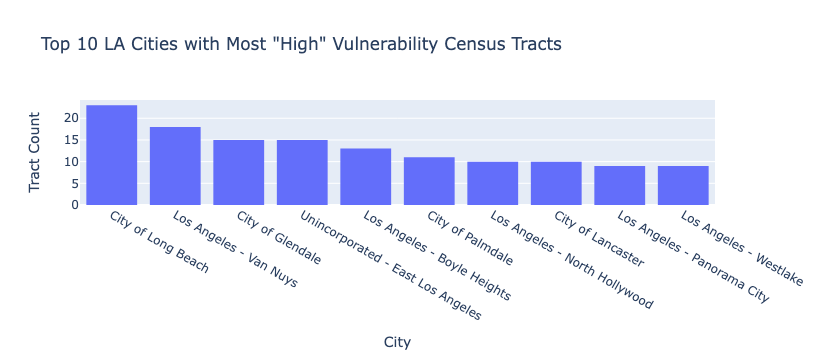

In [58]:
# a simple bar chart, putting city on the x-axis
fig = px.bar(svi_high_bycity.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='City',
       y='Tract Count',
       title='Top 10 LA Cities with Most "High" Vulnerability Census Tracts'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

From this graph, we can see that the City of Long Beach has 23 'High' vulnerability census tracts (5 more than the city with the next most). This is especially interesting because Long Beach is also know to have affluent areas that one would assume to have 'Low' vulnerability. This shows that planners cannot assume uniform social/climate vulnerability across cities -- we must consider vulnerability at more granular levels.

#### **Comparing 'High' vs 'Low' Vulnerability Census Tracts***

Now that we have a general sense of where social vulnerability hot spots are, let's take a closer look at how 'High' vulnerability census tracts compare to 'Low' vulnerability census tracts in terms of specific social indicators such as language isolation, education, renter status, poverty, and race. 

I've selected these indicators as they are particularly relevant to ***disaster resilience*** and ***adaptive capacity***.

#### **Top 10 'High' Vulnerability Census Tracts**

In [59]:
# Sort 'High' vulnerability census tracts to look at top 10 most vulnerable and create new dataframe
svi_high_sorted = svi_high.sort_values(by=['SoVI_Score'],ascending = [False])

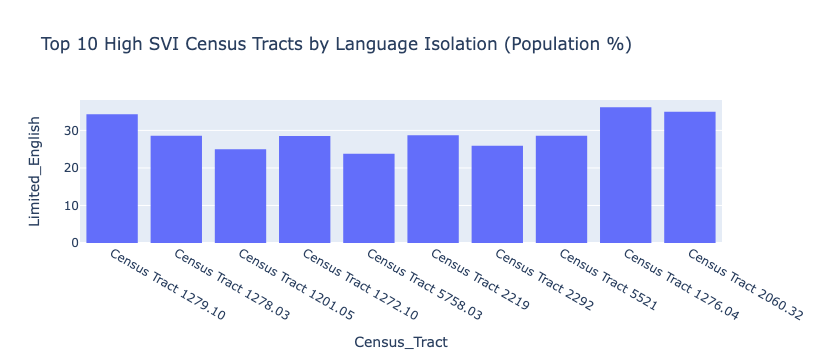

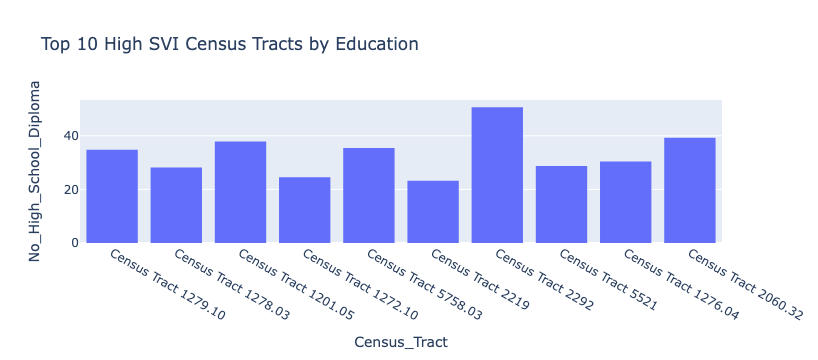

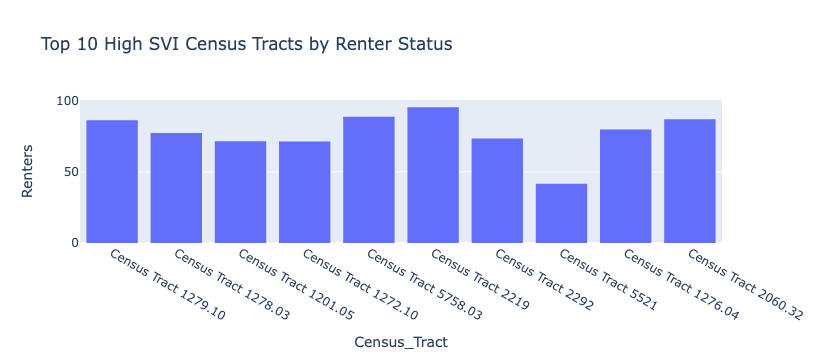

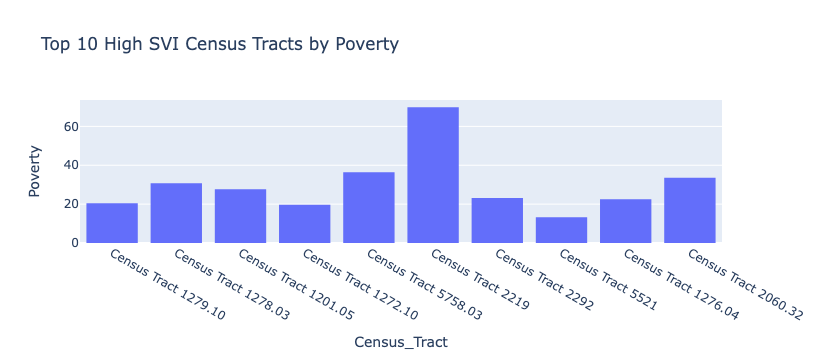

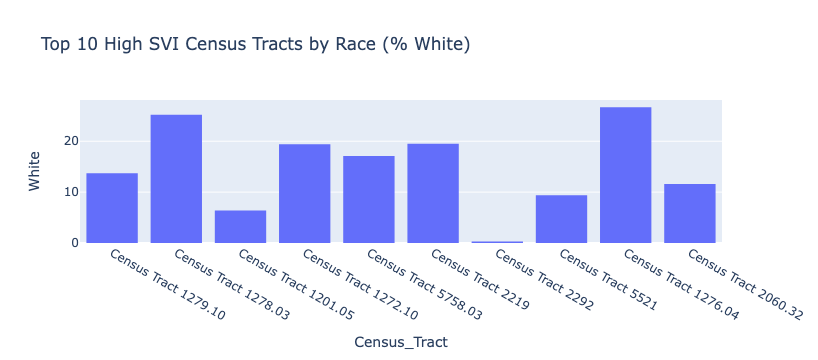

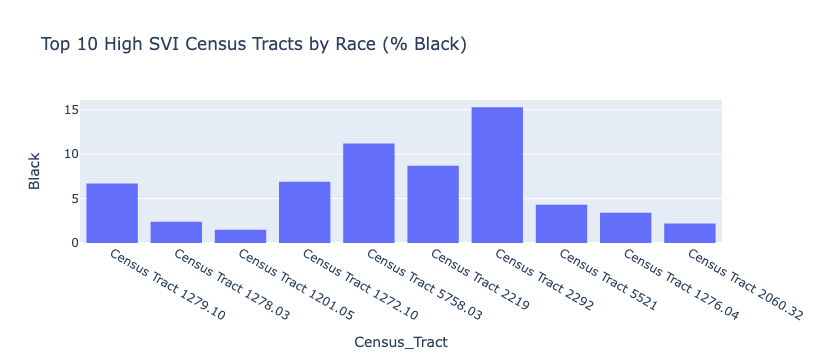

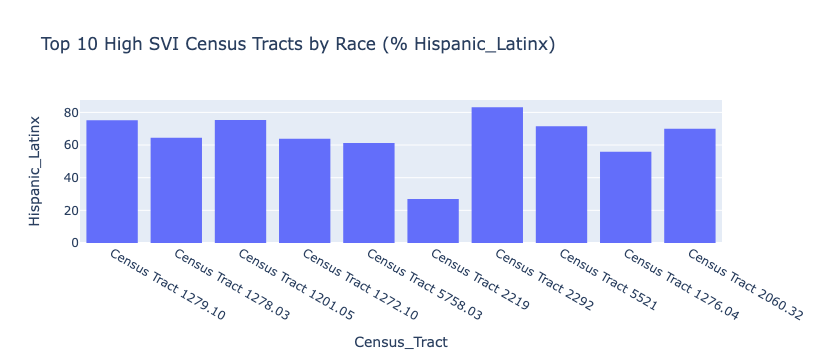

In [60]:
# creates 7 bar charts displaying data on selected social indicators for Top 10 Highest SVI census tracts
# simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Limited_English',
       title='Top 10 High SVI Census Tracts by Language Isolation (Population %)'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='No_High_School_Diploma',
       title='Top 10 High SVI Census Tracts by Education'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Renters',
       title='Top 10 High SVI Census Tracts by Renter Status'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Poverty',
       title='Top 10 High SVI Census Tracts by Poverty'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='White',
       title='Top 10 High SVI Census Tracts by Race (% White)'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Black',
       title='Top 10 High SVI Census Tracts by Race (% Black)'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_high_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Hispanic_Latinx',
       title='Top 10 High SVI Census Tracts by Race (% Hispanic_Latinx)'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

#### **Top 10 'Low' Vulnerability Census Tracts**

In [61]:
# Sort 'Low' vulnerability census tracts to look at top 10 least vulnerable and create new dataframe
svi_low_sorted = svi_low.sort_values(by=['SoVI_Score'],ascending = [True])

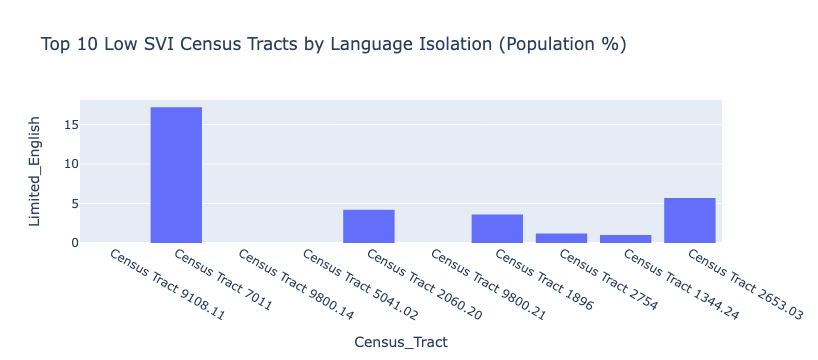

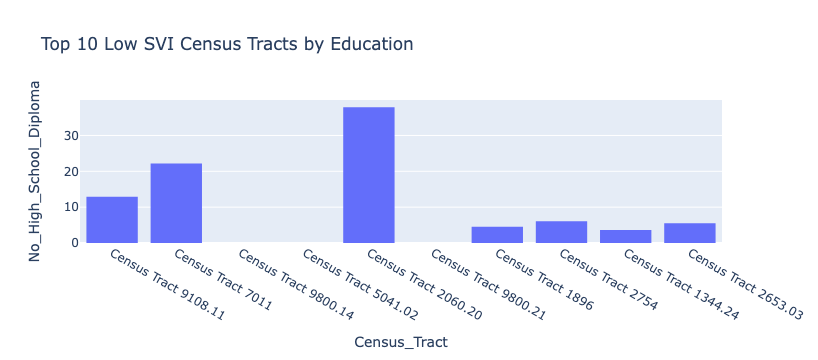

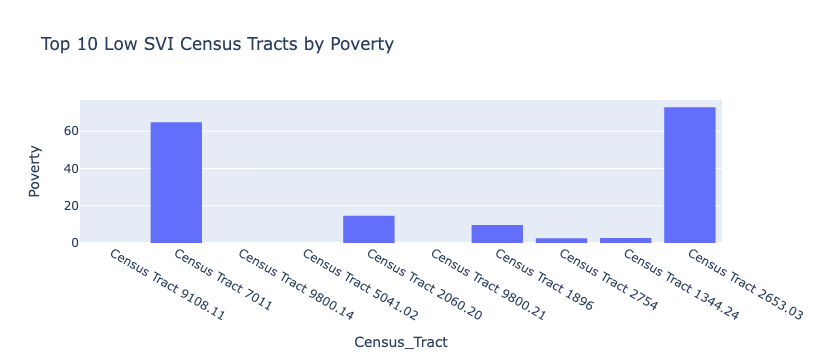

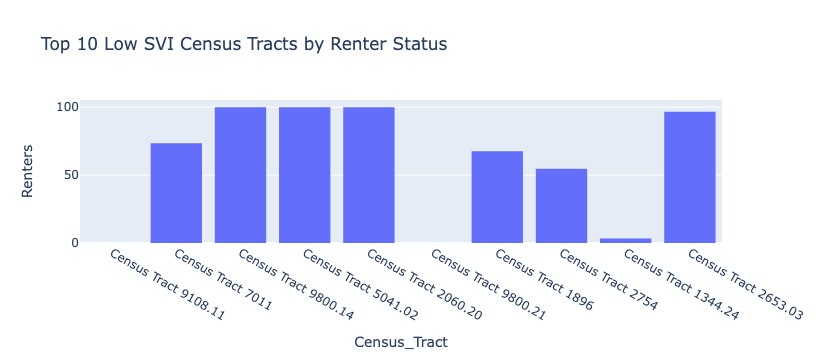

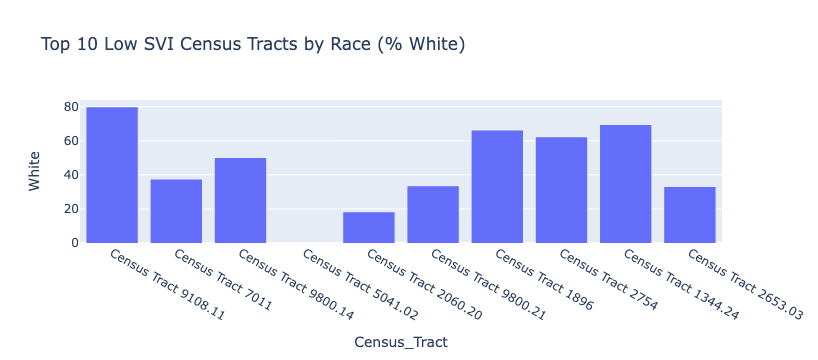

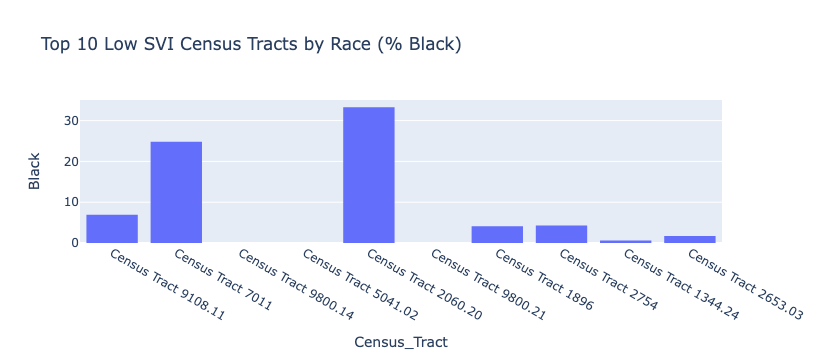

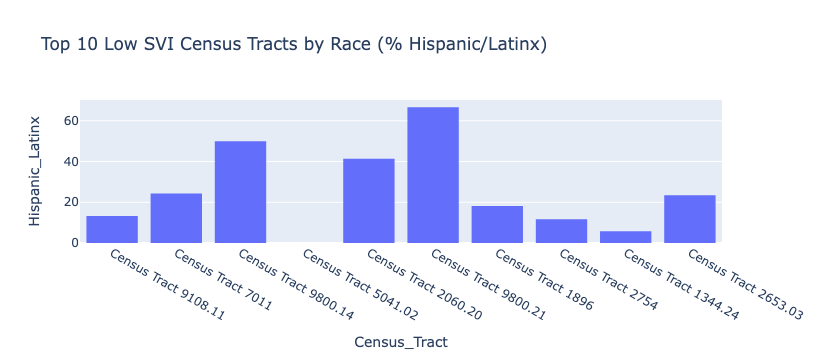

In [62]:
# creates 7 bar charts displaying data on selected social indicators for Top 10 Lowest SVI census tracts
# a simple bar chart, putting date on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Limited_English',
       title='Top 10 Low SVI Census Tracts by Language Isolation (Population %)'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='No_High_School_Diploma',
       title='Top 10 Low SVI Census Tracts by Education'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Poverty',
       title='Top 10 Low SVI Census Tracts by Poverty'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Renters',
       title='Top 10 Low SVI Census Tracts by Renter Status'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='White',
       title='Top 10 Low SVI Census Tracts by Race (% White)'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Black',
       title='Top 10 Low SVI Census Tracts by Race (% Black)'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

# a simple bar chart, putting census tract on the x-axis
fig = px.bar(svi_low_sorted.head(10),  ## px = plotly express, bar = bar graphs, fig = figure
       x='Census_Tract',
       y='Hispanic_Latinx',
       title='Top 10 Low SVI Census Tracts by Race (% Hispanic/Latinx)'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

#### **Mapping Social Vulnerability (SVI) by Census Tract** ####

Okay, let's map SVI scores by census tracts and make it interactive!

<AxesSubplot: >

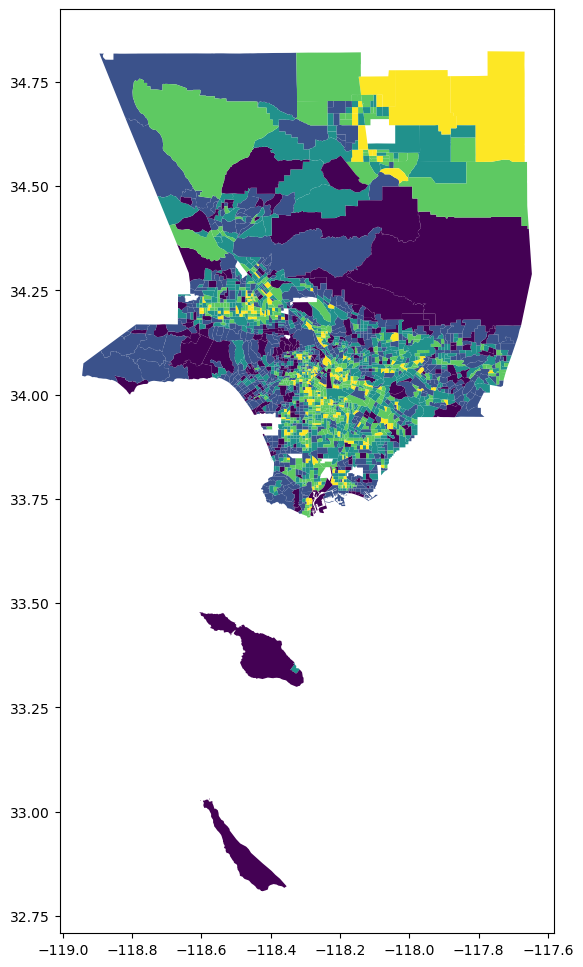

In [63]:
svi_df.plot(figsize=(14,12),
                 column='SoVI_Score',
                 legend=False, 
                 scheme='NaturalBreaks')

Now that we know more about what SVI scores mean in terms of social vulnerability and specific indicators, we are able to understand this map on a deeper level. For the areas with high SVI hot spots such as Antelope Valley, Long Beach, LA Metro, and the San Fernando Valley, disaster planning and recovery efforts should concentrate aid and resources in these areas to boost resilience and adaptive capacity.

### <u> Next Steps <u> ###
#### **Part 1b: SVI by Neighborhood (see next notebook)**
From the perspective of LA county planners and policymakers, however, looking at social vulnerability at the census tract level may not be the most helpful as it is difficult to get a sense of community impact and jurisdiction at such a granular level. Additionally, people do not identify with their communities at the census tract level...they do however, identify with their community at the neighborhood level. Therefore, it will be useful to visualize social vulnerability (SVI) at the neighborhood level so that local officials can hone in on their specific neighborhoods and determine jurisdictions for planning and policy efforts.